feature: pclass, sex, fare
label: survived
1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 
2. train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.
5~ 8 .titanic 통계값을 구하시요(문제는 자율)


In [2]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score,roc_curve,f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import matplotlib
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"]= False
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=12.8,10.8
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## 1. 1등급, female, 32달러 인경우 생사유무를 예측하시오 

In [3]:
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic_df = titanic[['pclass','sex','fare','survived']]
x_data = titanic_df.drop('survived', axis = 1)
y_data = titanic_df[['survived']]

In [5]:
x_data['sex'] = x_data['sex'].replace(['male', 'female'], [0, 1])

In [6]:
x_data

,pclass,sex,fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500
...,...,...,...
886,2,0,13.0000
887,1,1,30.0000
888,3,1,23.4500
889,1,0,30.0000


In [7]:
### fare만 스케일링을 했습니다 (제일 점수 잘나와서)
scalex= StandardScaler()
x_data['fare'] = scalex.fit_transform(x_data[['fare']].values)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)

In [9]:
model_logistic = make_pipeline(LogisticRegression())
param_value = {'logisticregression__C': np.linspace(0, 1, 20),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model_logistic, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', 'none'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']},
             scoring='f1')

▼scalex is not defined

In [10]:
# predict (1등급, female, 32달러)
scv = scalex.transform([[32]])
print(gridS.predict_proba([[1, 1, scv[0]]]))
print(gridS.predict([[1, 1, scv[0]]]))
print('생존했을 가능성이 크다')

[[0.15090599 0.84909401]]
[1]
생존했을 가능성이 크다


## 2. train, test, f1 score 를 구하시오

In [11]:
# train
y_predict = gridS.predict(x_train)
print('train precision score : ', precision_score(y_train, y_predict))
print('train recall score : ', recall_score(y_train, y_predict))
print('f1_score : ', f1_score(y_train, y_predict))
print()
#test
y_predict = gridS.predict(x_test)
print('test precision score : ', precision_score(y_test, y_predict))
print('test recall score : ', recall_score(y_test, y_predict))
print('f1_score : ', f1_score(y_test, y_predict))

train precision score :  0.74
train recall score :  0.6776556776556777
f1_score :  0.7074569789674952

test precision score :  0.7575757575757576
test recall score :  0.7246376811594203
f1_score :  0.7407407407407408


## 3. confusion matrix 를 구하고 heatmap 을 그리시오.

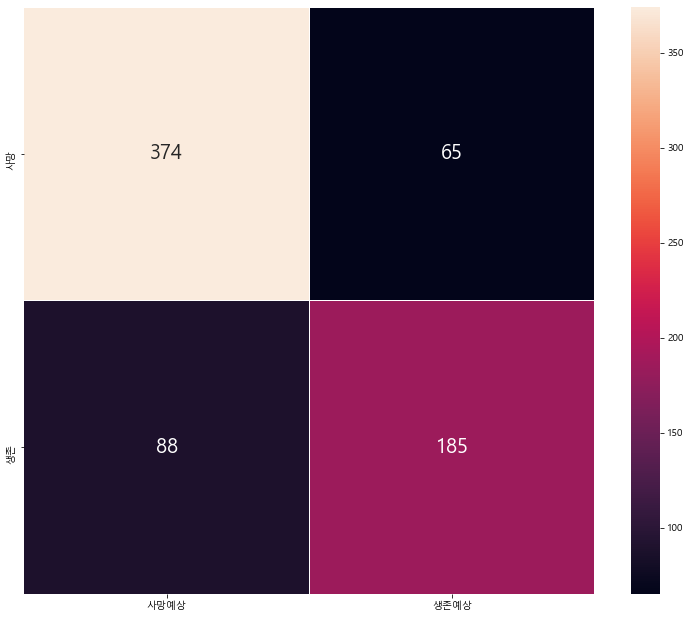

In [12]:
y_train_pred = gridS.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm_train, annot = True,fmt='d', yticklabels = ['사망', '생존'], xticklabels = ['사망예상', '생존예상'],annot_kws={"size": 20},linewidths=.5)
plt.show()


## 4. roc curve 를 그리시오.

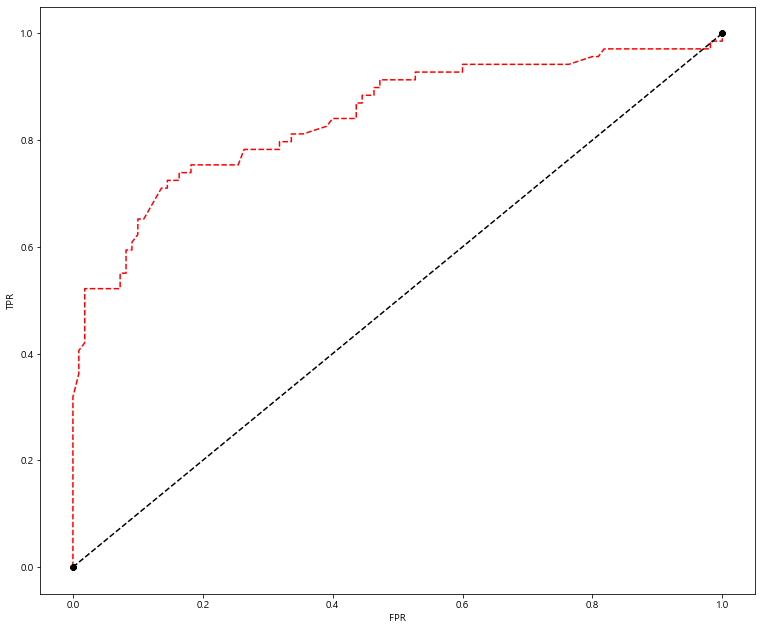

In [13]:
p = gridS.predict_proba(x_test)

df = y_test.copy()

df['proba'] = p[:, 1]

df.sort_values(by='proba')

df['proba']

fpr, tpr, thresholds = roc_curve(y_test.values, df['proba'])
# print(fpr)
# print(tpr)
# print(thresholds)
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1], [0,1], 'k--8')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## 5.등급별 생존률

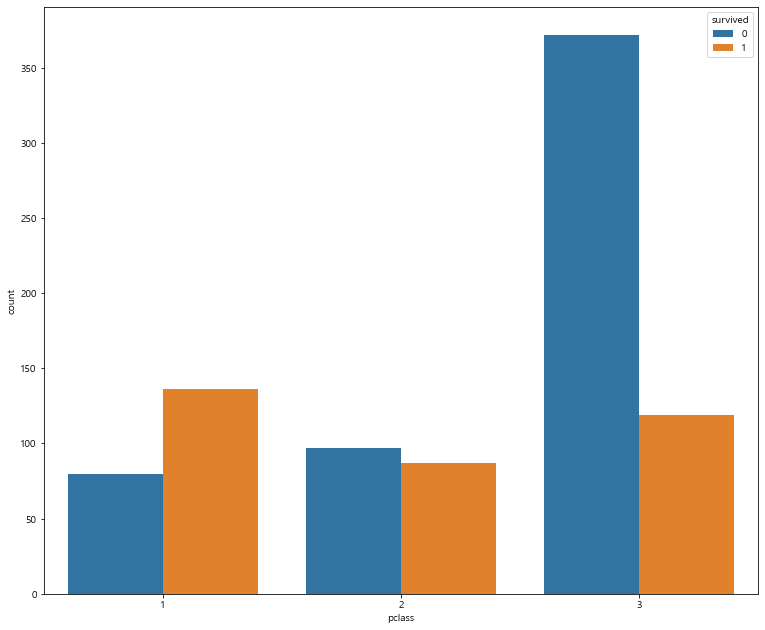

In [14]:
sns.countplot(x ='pclass', data = titanic, hue= 'survived')
plt.show()

## 6. pclass 별 성별 차이로 인한 생존률

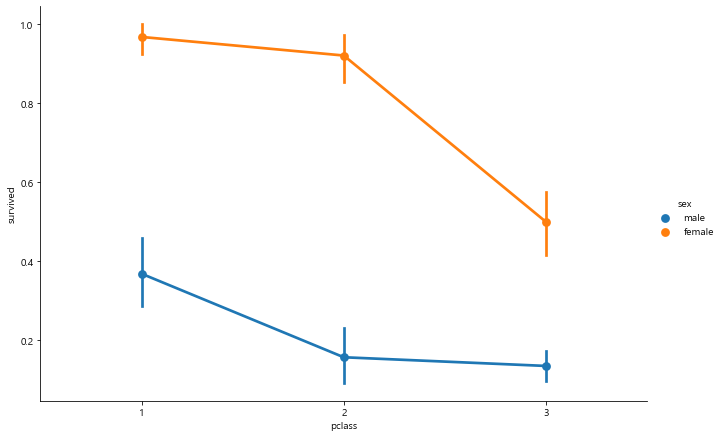

In [15]:
sns.factorplot('pclass', 'survived', hue='sex', data=titanic,
              size=6, aspect=1.5)
plt.show()

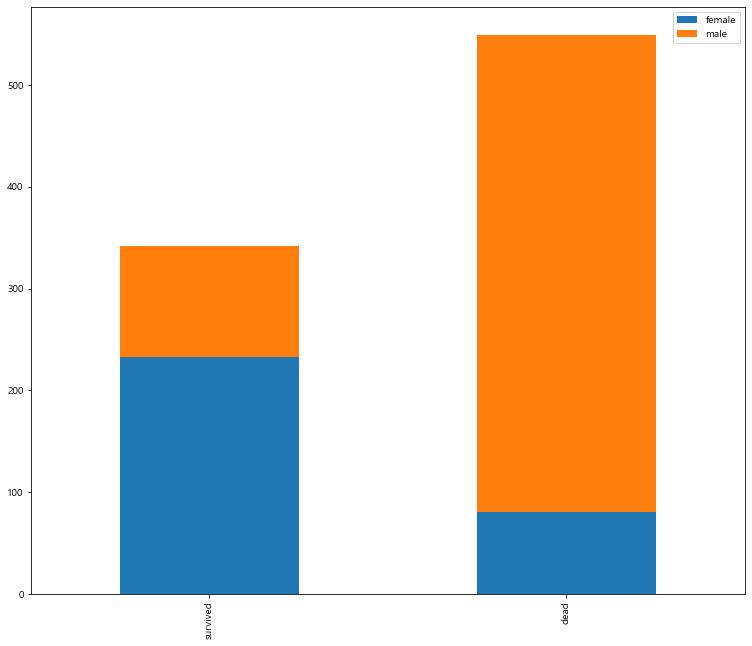

In [16]:
def bar_chart(feature):
    survived = titanic[titanic['survived']==1][feature].value_counts() 
    dead = titanic[titanic['survived']==0][feature].value_counts() 
    df = pd.DataFrame([survived,dead]) 
    df.index = ['survived','dead'] 
    df.plot(kind='bar',stacked=True) 
bar_chart('sex')

#### pclass 상관없이 여성의 생존률이 더 높다 

## 7. 낮은 등급의 요금이 높은 등급의 요금보다 높은 경우가 있을까

In [17]:
# 등급별 요금의 평균
titanic_df.groupby('pclass')['fare'].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [18]:
# pclass 별로 그룹을 나눴다
titanic_df_fare1 = [titanic_df['pclass'][i] == 1 for i in range(len(titanic))]
titanic_df_fare1 = titanic_df[titanic_df_fare1]

titanic_df_fare2 = [titanic_df['pclass'][i] == 2 for i in range(len(titanic))]
titanic_df_fare2 = titanic_df[titanic_df_fare2]

titanic_df_fare3 = [titanic_df['pclass'][i] == 3 for i in range(len(titanic))]
titanic_df_fare3 = titanic_df[titanic_df_fare3]

In [19]:
# 요금에 대한 결측치는 없지만 0이 있다.
print((titanic_df_fare1['fare'] == 0).sum())
print((titanic_df_fare2['fare'] == 0).sum())
print((titanic_df_fare3['fare'] == 0).sum())

5
6
4


In [20]:
# 무임승차가 아닐 것이라 판단하고 결측치로 생각하여 등급별 평균으로 요금을 대체해준다.
titanic_df_fare1['fare'][titanic_df_fare1['fare'] == 0] = titanic_df_fare1['fare'].mean()
titanic_df_fare2['fare'][titanic_df_fare2['fare'] == 0] = titanic_df_fare2['fare'].mean()
titanic_df_fare3['fare'][titanic_df_fare3['fare'] == 0] = titanic_df_fare3['fare'].mean()

print((titanic_df_fare1['fare'] == 0).sum())
print((titanic_df_fare2['fare'] == 0).sum())
print((titanic_df_fare3['fare'] == 0).sum())

0
0
0


In [21]:
print('pclass = 1인 승객의 최소 요금과 pclass = 2인 승객의 최대 요금 비교')
print(titanic_df_fare1['fare'].min(), titanic_df_fare2['fare'].max())
print()
print('pclass = 2인 승객의 최소 요금과 pclass = 3인 승객의 최대 요금 비교')
print(titanic_df_fare2['fare'].min(), titanic_df_fare3['fare'].max())

pclass = 1인 승객의 최소 요금과 pclass = 2인 승객의 최대 요금 비교
5.0 73.5

pclass = 2인 승객의 최소 요금과 pclass = 3인 승객의 최대 요금 비교
10.5 69.55


이유는 모르겠으나, pclass = 2와 pclass = 3인 승객의 요금도 비싼것이 있음을 알 수 있다.

## 8. 연령대별 빈도수 및 생존률 시각화

In [22]:
# 나이를 추가한 데이터프레임 생성
titanic_df = titanic[['pclass', 'age', 'sex', 'fare', 'survived']]

# 나이 결측치 확인
print('나이 결측치 총 갯수 :', titanic_df['age'].isna().sum())

나이 결측치 총 갯수 : 177


In [23]:
# sex와 pclass로 그룹을 나누어 그룹별 평균 나이를 구한다
a = titanic_df.groupby(['sex', 'pclass'])['age'].mean()
a

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [24]:
# 저걸 이용해서 결측값을 대체한다
a1 = titanic_df.groupby(['sex', 'pclass'])['age']
titanic_df['age'] = a1.apply(lambda x : x.fillna(x.mean()))

In [25]:
# 나이 결측치 다시 확인
titanic_df['age'].isna().sum()

0

In [26]:
# 연령대 열 생성
titanic_df['연령대'] = (titanic_df['age'] // 10) * 10
titanic_df

,pclass,age,sex,fare,survived,연령대
0,3,22.00,male,7.2500,0,20.0
1,1,38.00,female,71.2833,1,30.0
2,3,26.00,female,7.9250,1,20.0
3,1,35.00,female,53.1000,1,30.0
4,3,35.00,male,8.0500,0,30.0
...,...,...,...,...,...,...
886,2,27.00,male,13.0000,0,20.0
887,1,19.00,female,30.0000,1,10.0
888,3,21.75,female,23.4500,0,20.0
889,1,26.00,male,30.0000,1,20.0


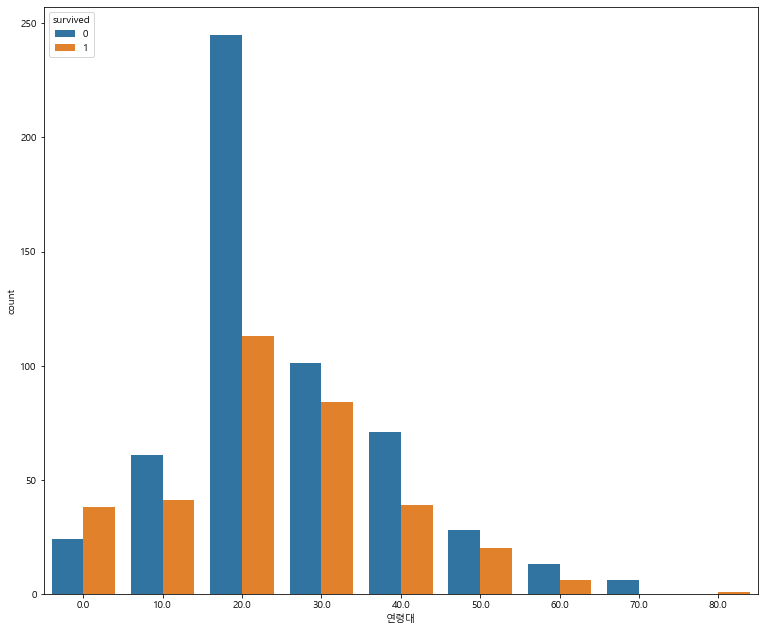

In [27]:
sns.countplot(x ='연령대', data = titanic_df, hue= 'survived')
plt.show()

아동을 제외한 모든 연령대에서 생존보다 사망자 수가 더 많다